In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data from local and displaying the First 10 Rows of Data Set

In [2]:
data = pd.read_csv('C:/Users/Lenovo/Downloads/hmeq.csv')
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


# Data Set Shape

In [3]:
print(data.shape)

(5960, 13)


# Data Description 

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [5]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

# My Target Variable where 1 represents applicant defaulted on loan or seriously delinquent and 0 reprsents applicant paid loan

In [6]:
data['BAD'].head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64

# Checking for the Missing values and Dropping them from the data DataFrame

In [7]:
data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [8]:
for column in data.columns:
    if column != "BAD":
        print(column, data[column].nunique())
    else:
        pass

LOAN 540
MORTDUE 5053
VALUE 5381
REASON 2
JOB 6
YOJ 99
DEROG 11
DELINQ 14
CLAGE 5314
NINQ 16
CLNO 62
DEBTINC 4693


In [9]:
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')

In [10]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,37.113614
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,37.113614
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,37.113614
3,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,37.113614
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


# Target Variable Analysis

In [11]:
count = pd.crosstab(index = data['BAD'], columns="count")
percentage = pd.crosstab(index = data['BAD'], columns="frequency")/pd.crosstab(index = data['BAD'], columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
BAD,,
0,4771,0.800503
1,1189,0.199497


# Analyzing the Categorical Variables

In [12]:
categorical_col = [cat_col for cat_col in data.columns if data[cat_col].dtype in ['object']]
cat_data = data[categorical_col]
print(cat_data)

       REASON     JOB
0     HomeImp   Other
1     HomeImp   Other
2     HomeImp   Other
3     HomeImp   Other
4     HomeImp  Office
...       ...     ...
5955  DebtCon   Other
5956  DebtCon   Other
5957  DebtCon   Other
5958  DebtCon   Other
5959  DebtCon   Other

[5960 rows x 2 columns]


# Visualizing the Categorical Data

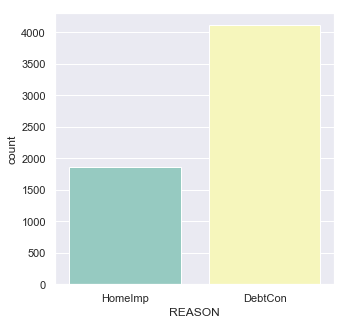

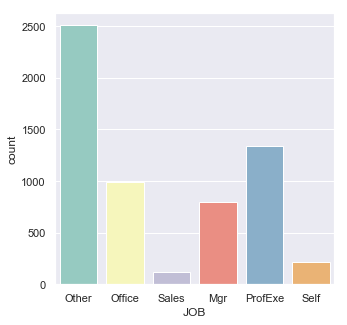

In [13]:
sns.set(rc = {'figure.figsize': (5, 5)})
fcat = ['REASON','JOB']

for col in fcat:
    plt.figure()
    sns.countplot(x=cat_data[col], data=cat_data, palette="Set3")
    plt.show()

# Encoding the Categorical Variable.
Using OneHot Encoder

In [14]:
dummy_var = pd.get_dummies(data)

In [15]:
dummy_var

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,37.113614,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,37.113614,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,37.113614,0,1,0,0,1,0,0,0
3,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,37.113614,0,1,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,37.113614,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


# Dropping the Depndent Variable from Data Frame

In [16]:
dependent_var = data['BAD']
dummy_var.drop(['BAD'], axis=1, inplace=True)

# Splitting the Data into Train and Test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy_var, dependent_var, test_size = 0.25, random_state=0)

Calling the ML Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
model = LogisticRegression(solver='liblinear', random_state=0)

# Converting the Data into Standardize features by removing the mean and scaling to unit variance

In [20]:
from sklearn.preprocessing import StandardScaler
import itertools
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

# Fitting the Model on the Trin Dataset

In [21]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the Model Test Set

In [22]:
y_pred = model.predict(X_test)

# Calling the Confusion Matrix and Comparing the Predected Results with Oberved Values

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1131   63]
 [ 211   85]]


In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1131   63]
 [ 211   85]]


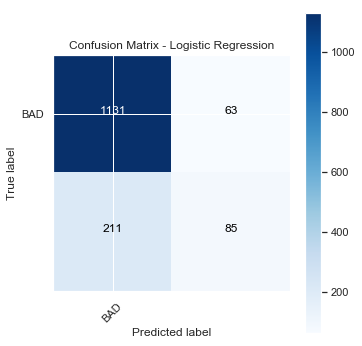

In [25]:
plot_confusion_matrix(cm, classes=["BAD"], title="Confusion Matrix - "+str('Logistic Regression'))

# Checking the Accuracy Score of the Model

In [26]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
accuracy

0.8161073825503355

In [27]:
classification_report = metrics.classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1194
           1       0.57      0.29      0.38       296

    accuracy                           0.82      1490
   macro avg       0.71      0.62      0.64      1490
weighted avg       0.79      0.82      0.79      1490



AUC Score: 76.66032867037892


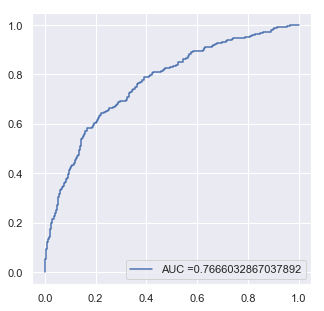

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC Score: {}'.format(auc*100))
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.legend(loc=4)
plt.show()

# Initiating the KNN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [30]:
KNN_pred = classifier.predict(X_test)

In [31]:
knn_cm = confusion_matrix(y_test, KNN_pred)
knn_cm

array([[1191,    3],
       [ 277,   19]], dtype=int64)

In [32]:
accuracy=metrics.accuracy_score(y_test, KNN_pred, normalize=True, sample_weight=None)
accuracy

0.8120805369127517

Confusion matrix, without normalization
[[1191    3]
 [ 277   19]]


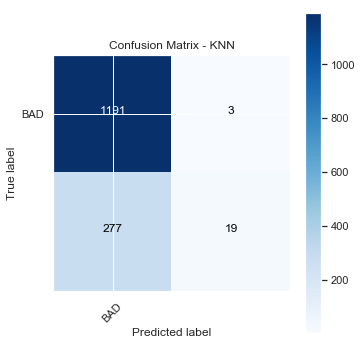

In [33]:
plot_confusion_matrix(knn_cm, classes=["BAD"], title="Confusion Matrix - "+str('KNN'))

In [34]:
classification_report = metrics.classification_report(y_test,KNN_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1194
           1       0.86      0.06      0.12       296

    accuracy                           0.81      1490
   macro avg       0.84      0.53      0.51      1490
weighted avg       0.82      0.81      0.74      1490



AUC Score: 73.56772601747477


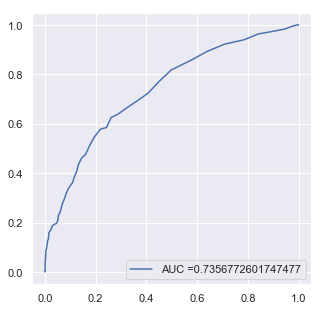

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
KNN_y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  KNN_y_pred_proba)
auc = metrics.roc_auc_score(y_test, KNN_y_pred_proba)
print('AUC Score: {}'.format(auc*100))
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.legend(loc=4)
plt.show()